<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [13]:
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [14]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [15]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [16]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [17]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [18]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


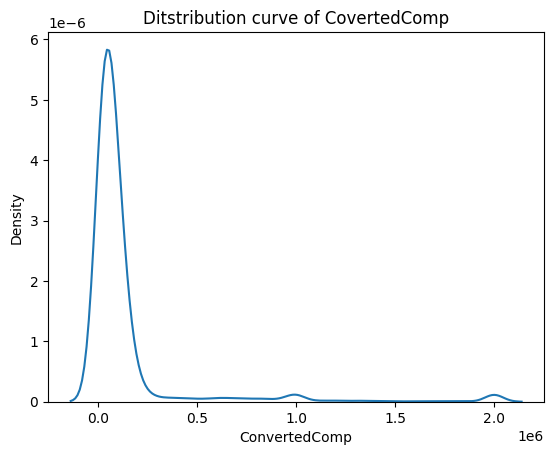

In [19]:
sns.kdeplot(df['ConvertedComp'].dropna())
plt.title('Ditstribution curve of CovertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


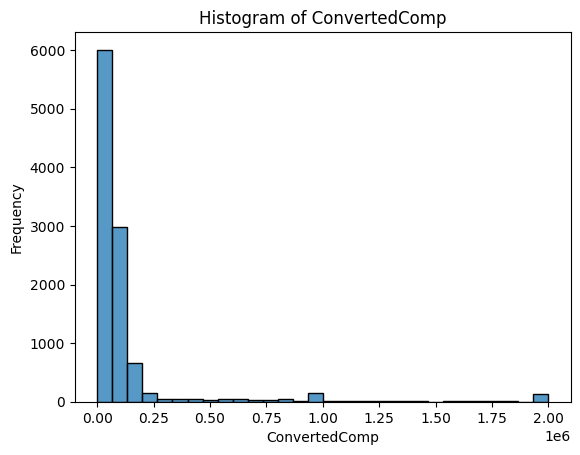

In [38]:
sns.histplot(df['ConvertedComp'].dropna(),bins=30, kde=False)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.grid(True)  #for grid lines
plt.show()
         

What is the median of the column `ConvertedComp`?


In [9]:
median_ConvertedComp = df['ConvertedComp'].median()
print(f"\n Median of 'ConvertedComp' column: {median_ConvertedComp}")




 Median of 'ConvertedComp' column: 57745.0


In [40]:
num_man = df[df['Gender'] == 'Man'].shape[0]
print(f"\n No.of responders identified themselves only as a Man: {num_man}")


 No.of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [43]:
median_convertedcomp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"\n Median CovertedComp of responders identified themselves only as a woman: {median_convertedcomp_woman}")



 Median CovertedComp of responders identified themselves only as a woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [44]:
age_summary = df['Age'].describe(percentiles = [.25, .5, .75])
five_number_summary_age = {
    'min' : age_summary['min'],
    'q1' : age_summary['25%'],
    'median' : age_summary['50%'],
    'q3' : age_summary['75%'],
    'max' : age_summary['max']
}
print(f"\n The five number summary for the column 'Age': {five_number_summary_age}")



 The five number summary for the column 'Age': {'min': 16.0, 'q1': 25.0, 'median': 29.0, 'q3': 35.0, 'max': 99.0}


Plot a histogram of the column `Age`.


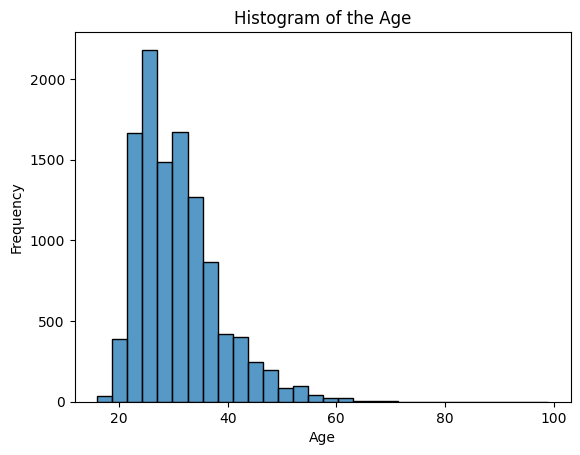

In [49]:
.sns.histplot(df['Age'].dropna(),bins = 30, kde =False )
plt.title('Histogram of the Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


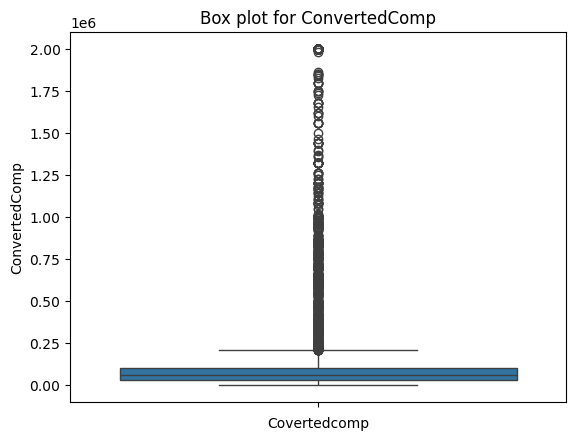

In [50]:
sns.boxplot(df['ConvertedComp'].dropna())
plt.title('Box plot for ConvertedComp')
plt.xlabel('Covertedcomp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [68]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range(IQR) for ConvertedComp: {IQR}")

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Count the number of outliers below Q1 for Age
age_outliers_below_Q1 = df[df['Age'] < Q1_age - 1.5 * IQR_age].shape[0]
print(f'The number of outliers below Q1 in the Age column: {age_outliers_below_Q1}')

Inter Quartile Range(IQR) for ConvertedComp: 73132.0
The number of outliers below Q1 in the Age column: 0


Find out the upper and lower bounds.


In [55]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Outer bound: {upper_bound}")

Lower bound: -82830.0
Outer bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [60]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"The nuumber of outliers are in 'ConvertedComp': {num_outliers}")

median_outliers = df['ConvertedComp'].median()
print(f"Median Outliers: {median_outliers}")


The nuumber of outliers are in 'ConvertedComp': 879
Median Outliers: 57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [69]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

median_convertedcomp_no_outliers = df_no_outliers['ConvertedComp'].median()
print(f'Median ConvertedComp after removing outliers: {median_convertedcomp_no_outliers}')

mean_convertedcomp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print(f'Mean ConvertedComp after removing outliers: {mean_convertedcomp_no_outliers}')

Median ConvertedComp after removing outliers: 52704.0
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [58]:
correlation_matrix = df_no_outliers.corr()
Age_correlation = correlation_matrix['Age']
print(f"Correlation betwee Age and all other numerical columns: {Age_correlation}")

<ipython-input-58-c39c8cddacc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outliers.corr()


Correlation betwee Age and all other numerical columns: Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
